In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import axes
import pickle
from datetime import datetime
from scipy import log,exp,sqrt,stats
print('Packages')

Packages


In [2]:
# Importing pickle file
data = np.load('/Users/louisribieras/Desktop/IXPERIENCE/my_invictus/data/latest_coin_data.pkl')
# Drop Null Values
data = data.dropna()

print('Loading of Data')
print('shape of data: ', data.shape)

Loading of Data
shape of data:  (133, 916)


In [3]:
print('Making Volumes dataframe: volumes')

# Initialize a close_price list
volumes_list = list()
# Making a list of all close_prices
for date in data.index:
    for column in data.columns:
        volumes_list.append(data[column][date]['volume'])

# Splitting list into 133 lists (one per coin)
volumes_list = [volumes_list[i:i+916] for i  in range(0, len(volumes_list), 916)]   

volumes = pd.DataFrame(data = volumes_list, index = data.index, columns = data.columns)
# Reordering column index
volumes = volumes[volumes.columns[::-1]]

# original date index
data_index = volumes.columns[::7]

# Index to Datetime index
volumes.columns = pd.to_datetime(volumes.columns)

# Weekly Median volumes
volumes = volumes.resample('W', axis = 1).median()

# Deleting first day
del volumes['2016-01-03 00:00:00']

print('Shape of Volumes df: ', volumes.shape)
volumes.head(3)

Making Volumes dataframe: volumes
Shape of Volumes df:  (133, 131)


,2016-01-10 00:00:00,2016-01-17 00:00:00,2016-01-24 00:00:00,2016-01-31 00:00:00,2016-02-07 00:00:00,2016-02-14 00:00:00,2016-02-21 00:00:00,2016-02-28 00:00:00,2016-03-06 00:00:00,2016-03-13 00:00:00,...,2018-05-06 00:00:00,2018-05-13 00:00:00,2018-05-20 00:00:00,2018-05-27 00:00:00,2018-06-03 00:00:00,2018-06-10 00:00:00,2018-06-17 00:00:00,2018-06-24 00:00:00,2018-07-01 00:00:00,2018-07-08 00:00:00
1337coin,16.0,14.0,36.0,80.0,42.0,57.0,149.0,136.0,242.0,241.0,...,3693.0,1920.0,6996.0,2476.0,1274.0,1941.0,1257.0,1778.0,769.0,2343.0
advanced-internet-blocks,89.0,88.0,84.0,9.0,4.0,1.0,2.0,2.0,1.0,757.0,...,34.0,364.0,9.0,4.0,4.0,10.0,16.0,9.0,3.0,44.0
adzcoin,1021.0,917.0,319.0,843.0,325.0,268.0,418.0,209.0,267.0,1254.0,...,4292.0,2605.0,1886.0,5867.0,5149.0,7427.0,1724.0,2537.0,1280.0,925.0


In [4]:
print('Close Price dataframe: close_df')
# Initialize a close_price list
close_list = list()
# Making a list of all close_prices
for date in data.index:
    for column in data.columns:
        close_list.append(data[column][date]['close_price'])

# Splitting list into 133 lists (one per coin)
close_list2 = [close_list[i:i+916] for i  in range(0, len(close_list), 916)]

# Making a Dataframe
close_df = pd.DataFrame(data = close_list2, index = data.index, columns = data.columns)

# Reordering columns
close_df = close_df[close_df.columns[::-1]]

# Index to Datetime index
close_df.columns = pd.to_datetime(close_df.columns)

# Weekly Median close_df
close_df = close_df.resample('W', axis = 1).median()

# Deleting first day
del close_df['2016-01-03 00:00:00']

close_df.head(3)

Close Price dataframe: close_df


,2016-01-10 00:00:00,2016-01-17 00:00:00,2016-01-24 00:00:00,2016-01-31 00:00:00,2016-02-07 00:00:00,2016-02-14 00:00:00,2016-02-21 00:00:00,2016-02-28 00:00:00,2016-03-06 00:00:00,2016-03-13 00:00:00,...,2018-05-06 00:00:00,2018-05-13 00:00:00,2018-05-20 00:00:00,2018-05-27 00:00:00,2018-06-03 00:00:00,2018-06-10 00:00:00,2018-06-17 00:00:00,2018-06-24 00:00:00,2018-07-01 00:00:00,2018-07-08 00:00:00
1337coin,0.000017,0.000018,0.000027,0.000034,0.000027,0.000027,0.000037,0.000037,0.000033,0.000030,...,0.000162,0.000141,0.000115,0.000092,0.000086,0.000086,0.000075,0.000075,0.000062,0.000065
advanced-internet-blocks,0.003536,0.006535,0.006204,0.004655,0.004728,0.004559,0.005491,0.005611,0.007243,0.006986,...,0.004195,0.005302,0.004171,0.003280,0.002620,0.002574,0.002149,0.004627,0.002682,0.005060
adzcoin,0.017920,0.021857,0.021348,0.019708,0.012962,0.013454,0.011872,0.007935,0.013150,0.025035,...,0.023653,0.020782,0.018950,0.017137,0.017344,0.017028,0.018151,0.023448,0.019316,0.018122


In [5]:
# Reverting Index
close_df.columns = data_index
volumes.columns = data_index
print('Reverting Index')

Reverting Index


In [6]:
print('Calculating pct_change in close prices per week: close_pct')
weekly_close_df2 = close_df.copy().T
close_pct = weekly_close_df2.pct_change(1).T
close_pct.head(5)

Calculating pct_change in close prices per week: close_pct


,"Jan 01, 2016","Jan 08, 2016","Jan 15, 2016","Jan 22, 2016","Jan 29, 2016","Feb 05, 2016","Feb 12, 2016","Feb 19, 2016","Feb 26, 2016","Mar 04, 2016",...,"Apr 27, 2018","May 04, 2018","May 11, 2018","May 18, 2018","May 25, 2018","Jun 01, 2018","Jun 08, 2018","Jun 15, 2018","Jun 22, 2018","Jun 29, 2018"
1337coin,NaN,0.058824,0.500000,0.259259,-0.205882,0.000000,0.370370,0.000000,-0.108108,-0.090909,...,-0.084746,-0.129630,-0.184397,-0.200000,-0.065217,0.000000,-0.127907,0.000000,-0.173333,0.048387
advanced-internet-blocks,NaN,0.848133,-0.050650,-0.249678,0.015682,-0.035745,0.204431,0.021854,0.290857,-0.035483,...,-0.092973,0.263886,-0.213316,-0.213618,-0.201220,-0.017557,-0.165113,1.153094,-0.420359,0.886652
adzcoin,NaN,0.219699,-0.023288,-0.076822,-0.342298,0.037957,-0.117586,-0.331621,0.657215,0.903802,...,-0.232145,-0.121380,-0.088153,-0.095673,0.012079,-0.018220,0.065950,0.291830,-0.176220,-0.061814
aeon,NaN,-0.228037,-0.013310,-0.123079,0.334605,0.030021,0.151631,0.045797,0.184385,-0.013257,...,-0.059113,-0.005236,-0.005263,-0.158730,0.050314,-0.023952,-0.110429,-0.075862,-0.111940,0.100840
anarchistsprime,NaN,-0.128947,-0.444109,-0.059783,1.375723,-0.104623,-0.111413,1.437309,0.094103,0.548165,...,-0.023238,-0.356286,-0.009615,0.290049,-0.044920,0.070426,-0.158040,-0.045082,-0.390844,0.358384


In [7]:
print('Making weekly DataFrames: wv["date"]')
# Making weekly DataFrames
wv = {}
for week in volumes:
    wv[week] = pd.DataFrame(volumes[week].sort_values(ascending=False).head(10))
    wv[week].columns = ['Volume']

Making weekly DataFrames: wv["date"]


In [8]:
print('Calculating Proportions')
print()
# Calculating Proportion of volume in total top 10
for week in volumes.columns:
    wv[week]['Proportion'] = (wv[week]['Volume'])/(wv[week]['Volume'].sum())
    
print(wv['Jan 08, 2016'])
print()
print('total:                  ', wv['Jan 01, 2016']['Proportion'].sum())

Calculating Proportions

                Volume  Proportion
bitcoin    115607000.0    0.942270
litecoin     4170270.0    0.033990
ethereum     1171150.0    0.009546
factom        484656.0    0.003950
ripple        441054.0    0.003595
dogecoin      240252.0    0.001958
dash          176887.0    0.001442
bitshares     166116.0    0.001354
peercoin      165177.0    0.001346
nxt            67390.0    0.000549

total:                   1.0000000000000002


In [10]:
print('Corresponding Close Price & pct_change columns')
print('Creating simples and log lists')

coin_labels = list()
last_week_list = close_df.columns[1::]
simple_list = list()
log_list = list()

for week in wv:
    coin_labels.append(wv[week].index)      

# Adding close_price columns for top 10 coins
for (week, coin, last_week) in zip(close_df.columns, coin_labels, last_week_list):
    wv[week]['close_price'] = close_df[week][coin]
    wv[week]['prior_close'] = close_df[last_week][coin]
    wv[week]['pct_change_close'] = close_pct[week][coin]
    wv[week]['simple_returns'] = wv[week]['Proportion']*wv[week]['pct_change_close']
    wv[week]['logs'] = np.log((wv[week]['close_price'])/(wv[week]['prior_close']))
    wv[week]['prop_logs'] = wv[week]['Proportion']*wv[week]['logs']
    simple_list.append(sum(wv[week]['simple_returns']))
    log_list.append(sum(wv[week]['prop_logs']))
    
    
print('Weekly DataFrames with: Volume, Proportion, Close_Price, Pct_Change')
print()
print('Jan 08, 2016')
# Setting NaN values of jan 1, 2016 to 0
wv['Jan 01, 2016']['pct_change_close'] = 0
wv['Jan 08, 2016']

Corresponding Close Price & pct_change columns
Creating simples and log lists
Weekly DataFrames with: Volume, Proportion, Close_Price, Pct_Change

Jan 08, 2016


,Volume,Proportion,close_price,prior_close,pct_change_close,simple_returns,logs,prop_logs
bitcoin,115607000.0,0.942270,430.310000,387.490000,-0.038650,-0.036418,0.104816,0.098765
litecoin,4170270.0,0.033990,3.470000,3.100000,-0.019774,-0.000672,0.112752,0.003832
ethereum,1171150.0,0.009546,1.190000,1.530000,0.246752,0.002355,-0.251314,-0.002399
factom,484656.0,0.003950,0.967830,0.991766,0.552042,0.002181,-0.024431,-0.000097
ripple,441054.0,0.003595,0.005529,0.005271,-0.075727,-0.000272,0.047787,0.000172
dogecoin,240252.0,0.001958,0.000171,0.000168,0.187500,0.000367,0.017700,0.000035
dash,176887.0,0.001442,3.360000,4.490000,0.012048,0.000017,-0.289912,-0.000418
bitshares,166116.0,0.001354,0.003078,0.003043,-0.019745,-0.000027,0.011436,0.000015
peercoin,165177.0,0.001346,0.424689,0.399574,0.020345,0.000027,0.060958,0.000082
nxt,67390.0,0.000549,0.007073,0.007118,0.094214,0.000052,-0.006342,-0.000003


In [11]:
print('Returns Dataframe')
Returns = pd.DataFrame(data = simple_list, index = volumes.columns[1:], 
                       columns = ['Simple_Returns'])
Returns['Log_Returns'] = log_list
Returns['Cum_Simple_Returns'] = (1 + Returns['Simple_Returns']).cumprod()
Returns['Cum_Log_Returns'] = Returns['Log_Returns'].cumsum()

Returns.tail(5)

Returns Dataframe


,Simple_Returns,Log_Returns,Cum_Simple_Returns,Cum_Log_Returns
"Jun 01, 2018",-0.008089,-0.019146,573.225019,-3.238610
"Jun 08, 2018",0.019063,0.123755,584.152417,-3.114855
"Jun 15, 2018",-0.113102,-0.018719,518.083329,-3.133574
"Jun 22, 2018",0.019283,0.080332,528.073565,-3.053243
"Jun 29, 2018",-0.071977,-0.041748,490.064643,-3.094990


In [12]:
Returns_M = Returns.copy()

# Index to Datetime index
range = pd.date_range('2016-01-08', '2018-06-29', freq='7D')
Returns_M.index = range
Returns_M.index = pd.to_datetime(Returns_M.index)

# Monthly Volatility
Returns_M = Returns_M.Simple_Returns.resample('M').mean()
Returns_M.head(5)

2016-01-31   -0.012281
2016-02-29    0.104835
2016-03-31    0.059427
2016-04-30   -0.001981
2016-05-31    0.046049
Freq: M, Name: Simple_Returns, dtype: float64

In [13]:
print('Monthly Index Labels', )
monthly_index = ['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', 
               '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', 
               '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
               '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
               '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06']

Monthly Index Labels


In [14]:
volatility = np.std(Returns['Log_Returns'], axis = 0)*100
print('Total Volatility: ', volatility, '%')

Total Volatility:  9.119378501421846 %


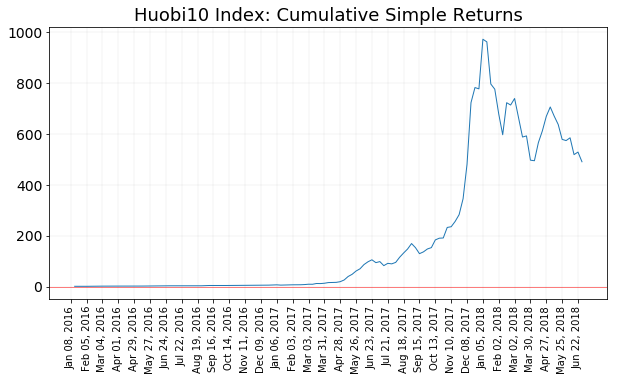

In [15]:
plt.plot(Returns['Cum_Simple_Returns'], linewidth = 1)
plt.plot()
plt.axhline(0, color='red', linewidth = 0.5)
plt.title('Huobi10 Index: Cumulative Simple Returns', fontsize = 18)
plt.rcParams['figure.figsize'] = (10,5)
plt.grid(color='black', linestyle='-', linewidth=0.05)
plt.xticks(np.arange(0,131,step=4), rotation=90, fontsize = 10)
plt.yticks(fontsize = 14)
plt.show()

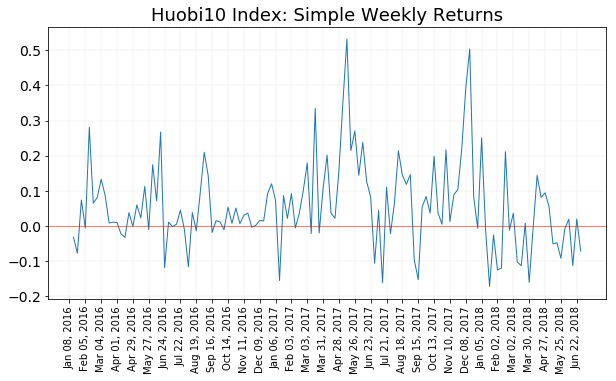

In [16]:
plt.plot(Returns['Simple_Returns'], linewidth = 1)
plt.plot()
plt.axhline(0, color='red', linewidth = 0.5)
plt.title('Huobi10 Index: Simple Weekly Returns', fontsize = 18)
plt.rcParams['figure.figsize'] = (10,5)
plt.grid(color='black', linestyle='-', linewidth=0.05)
plt.xticks(np.arange(0,131,step=4), rotation=90, fontsize = 10)
plt.yticks(fontsize = 14)
plt.show()

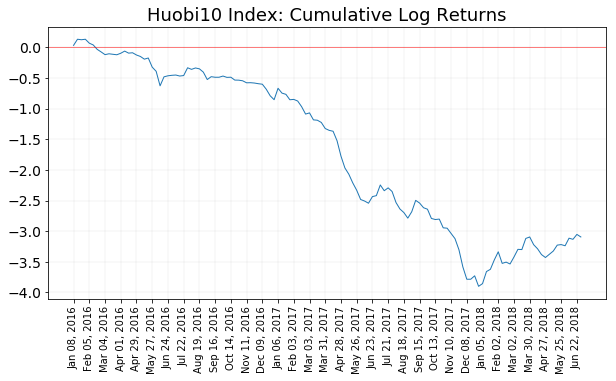

In [60]:
plt.plot(Returns['Cum_Log_Returns'], linewidth = 1)
plt.plot()
plt.axhline(0, color='red', linewidth = 0.5)
plt.title('Huobi10 Index: Cumulative Log Returns', fontsize = 18)
plt.rcParams['figure.figsize'] = (10,5)
plt.grid(color='black', linestyle='-', linewidth=0.05)
plt.xticks(np.arange(0,131,step=4), rotation=90, fontsize = 10)
plt.yticks(fontsize = 14)
plt.show()